In [2]:
from DataClean import Data
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_edit = Data('./data/Manual Tagged Data/','edit distance', 'basic', tag=True, data_structure='clean').df

def Data_twist(df):
    df = df.fillna(0)
    for i in range(df.shape[0]):
        if df.loc[i,'AAA'] == '1,2':
            df.loc[i,'AAA'] = 2
        elif df.loc[i,'AAA'] == '0,1':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] == '0,2':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] == '0,1,2':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] =='/':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] == np.nan:
            df.loc[i,'AAA'] = 0
    return df

data_edit = Data_twist(data_edit)

Data Merge Finished. 499 files are merged.


Class=0, n=12388 (64.014%)
Class=1, n=1024 (5.291%)
Class=2, n=5940 (30.695%)


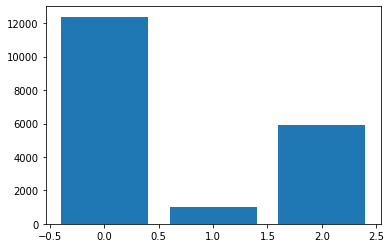

Class=0, n=12388 (33.333%)
Class=1, n=12388 (33.333%)
Class=2, n=12388 (33.333%)


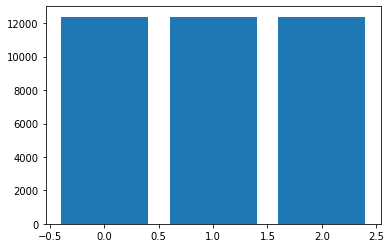

In [3]:
from collections import Counter
y = np.array(data_edit.AAA)
# for i in range(len(y)):
#     if y[i] == '1,2':
#         y[i] = 2
#     elif y[i] == '0,1':
#         y[i] = 0
#     elif y[i] == '0,2':
#         y[i] = 0
#     elif y[i] == '0,1,2':
#         y[i] = 0
#     elif y[i] =='/':
#         y[i] = 0
#     elif y[i] == 'nan':
#         y[i] = 0


X = np.array(data_edit.drop(labels=['testClassName','testMethodName','potentialTargetQualifiedName','AAA'], axis=1))

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [5]:
def acc_kf(prob, y_test):
    count = 0
    target_count = 0
    target_acc_count = 0
    assert_count = 0
    assert_acc_count = 0
    for _ in range(len(prob)):
        if prob[_] == y_test[_]:
            count += 1
        if prob[_] == y_test[_] and prob[_] == 1:
            target_acc_count += 1
        if y_test[_] == 1:
            target_count +=1
        if prob[_] == y_test[_] and prob[_] == 2:
            assert_acc_count +=1
        if y_test[_] == 2:
            assert_count +=1
    acc = count/len(y_test)
    try:
        action_acc = target_acc_count/target_count
        print("Action Accuracy: {num}".format(num=action_acc))
    except Exception as e:
        print(e)
    # print(assert_count)
    # print(assert_acc_count)
    try:
        assert_acc = assert_acc_count/assert_count
        print("Assert accuracy: {num}".format(num=assert_acc))
    except Exception as e:
        print(e)
    print("accuracy : {num}".format(num=acc)) 
    
def recall_kf(predict, target):
    
    arrange_TP = 0
    arrange_FN = 0
    action_TP = 0
    action_FN = 0
    assert_TP = 0
    assert_FN = 0

    for _ in range(len(predict)):

        if predict[_] == target[_] and predict[_] == 0:
            arrange_TP += 1
        if predict[_] != target[_] and target[_] != 0:
            arrange_FN +=1
        if predict[_] == target[_] and predict[_] == 1:
            action_TP += 1
        if predict[_] != target[_] and target[_] != 1:
            action_FN +=1
        if predict[_] == target[_] and predict[_] == 2:
            assert_TP += 1
        if predict[_] != target[_] and target[_] != 2:
            assert_FN +=1

    try:
        arrange_recall = arrange_TP/(arrange_TP+arrange_FN)
        # print("Arrange Recall: {num}".format(num=arrange_recall))
    except Exception as e:
        print(e)
    # print(assert_count)
    # print(assert_acc_count)
    try:
        action_recall = action_TP/(action_TP+action_FN)
        # print("action recall: {num}".format(num=action_recall))
    except Exception as e:
        print(e)
    try:
        assert_recall = assert_TP/(assert_TP+assert_FN)
        # print("Assert recall: {num}".format(num=assert_recall))
    except Exception as e:
        print(e)
    return (arrange_recall,action_recall,assert_recall)

def percision_kf(predict, target):
    
    arrange_TP = 0
    arrange_FP = 0
    action_TP = 0
    action_FP = 0
    assert_TP = 0
    assert_FP = 0

    for _ in range(len(predict)):

        if predict[_] == target[_] and predict[_] == 0:
            arrange_TP += 1
        if predict[_] != target[_] and target[_] == 0:
            arrange_FP +=1
        if predict[_] == target[_] and predict[_] == 1:
            action_TP += 1
        if predict[_] != target[_] and target[_] == 1:
            action_FP +=1
        if predict[_] == target[_] and predict[_] == 2:
            assert_TP += 1
        if predict[_] != target[_] and target[_] == 2:
            assert_FP +=1

    try:
        arrange_per = arrange_TP/(arrange_TP+arrange_FP)
        # print("Arrange per: {num}".format(num=arrange_per))
    except Exception as e:
        print(e)
    # print(assert_count)
    # print(assert_acc_count)
    try:
        action_per = action_TP/(action_TP+action_FP)
        # print("action per: {num}".format(num=action_per))
    except Exception as e:
        print(e)
    try:
        assert_per = assert_TP/(assert_TP+assert_FP)
        # print("Assert per: {num}".format(num=assert_per))
    except Exception as e:
        print(e)
    return (arrange_per,action_per,assert_per)

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)

# 归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_edit_minmax = pd.DataFrame(data=scaler.fit_transform(X))
target_df = pd.DataFrame(data=y)

In [8]:
data_edit_minmax.drop([2,3,4,5,6],axis=1)

,0,1
0,0.107345,0.277778
1,0.101695,0.277778
2,0.096045,0.277778
3,0.090395,0.277778
4,0.084746,0.277778
...,...,...
37159,0.065206,0.111111
37160,0.000000,0.388889
37161,0.011299,0.388889
37162,0.011299,0.333333


In [10]:
## XGB drop

# result_df = pd.DataFrame(columns=['AD_Arrangement_Precision','AD_Arrangment_Recall','AD_Action_Precision','AD_Action_Recall','AD_Assert_Precision','AD_Assert_Recall','NS_Arrangement_Precision','NS_Arrangment_Recall','NS_Action_Precision','NS_Action_Recall','NS_Assert_Precision','NS_Assert_Recall','LV_Arrangement_Precision','LV_Arrangment_Recall','LV_Action_Precision','LV_Action_Recall','LV_Assert_Precision','LV_Assert_Recall','MK_Arrangement_Precision','MK_Arrangment_Recall','MK_Action_Precision','MK_Action_Recall','MK_Assert_Precision','MK_Assert_Recall','NW_Arrangement_Precision','NW_Arrangment_Recall','NW_Action_Precision','NW_Action_Recall','NW_Assert_Precision','NW_Assert_Recall','TS_Arrangement_Precision','TS_Arrangment_Recall','TS_Action_Precision','TS_Action_Recall','TS_Assert_Precision','TS_Assert_Recall','GT_Arrangement_Precision','GT_Arrangment_Recall','GT_Action_Precision','GT_Action_Recall','GT_Assert_Precision','GT_Assert_Recall','ST_Arrangement_Precision','ST_Arrangment_Recall','ST_Action_Precision','ST_Action_Recall','ST_Assert_Precision','ST_Assert_Recall','Base_Arrangement_Precision','Base_Arrangment_Recall','Base_Action_Precision','Base_Action_Recall','Base_Assert_Precision','Base_Assert_Recall'])
result_df = pd.DataFrame(columns=['AD_Arrangement_Precision','AD_Arrangment_Recall','AD_Action_Precision','AD_Action_Recall','AD_Assert_Precision','AD_Assert_Recall','NS_Arrangement_Precision','NS_Arrangment_Recall','NS_Action_Precision','NS_Action_Recall','NS_Assert_Precision','NS_Assert_Recall','FT_Arrangement_Precision','FT_Arrangment_Recall','FT_Action_Precision','FT_Action_Recall','FT_Assert_Precision','FT_Assert_Recall','Base_Arrangement_Precision','Base_Arrangment_Recall','Base_Action_Precision','Base_Action_Recall','Base_Assert_Precision','Base_Assert_Recall'])

rounds = 0
for i in range(10):
    rounds += 1
    for train_index, test_index in kf.split(data_edit_minmax):
        column_list = []
        ### Shuffle first then train and test ###
        for feature_number in range(3):
            if feature_number <= 2:
                data_edit_minmax_drop = data_edit_minmax.drop([feature_number],axis=1)
            elif feature_number == 2:
                data_edit_minmax_drop = data_edit_minmax.drop([2,3,4,5,6],axis=1)
            # data_edit_minmax_shuffle[feature_number] = np.random.permutation(data_edit_minmax[feature_number].values)

            x_train, x_test = data_edit_minmax_drop.iloc[train_index],data_edit_minmax_drop.iloc[test_index]
            y_train, y_test = target_df.iloc[train_index],target_df.iloc[test_index]


            dtrain = xgb.DMatrix(data=x_train,label=y_train)
            dtest = xgb.DMatrix(data=x_test,label=y_test)

            param = {'max_depth':5, 'eta':0.5, 'verbosity':1, 'objective':'multi:softprob', 'num_class':3}
            param['nthread'] = 4
            param['seed'] = 100
            num_round = 100
            bst_without_evallist = xgb.train(param, dtrain, num_round)
            ans = bst_without_evallist.predict(dtest)
            prob = np.argmax(ans, axis=1)

            arrange_recall,action_recall,assert_recall =recall_kf(prob,y_test.values)
            arrange_pre,action_pre,assert_pre = percision_kf(prob,y_test.values)
            column_list = column_list + [arrange_pre,arrange_recall,action_pre,action_recall,assert_pre,assert_recall]
            # print(column_list)
        
        x_train, x_test = data_edit_minmax.iloc[train_index],data_edit_minmax.iloc[test_index]
        y_train, y_test = target_df.iloc[train_index],target_df.iloc[test_index]

        dtrain = xgb.DMatrix(data=x_train,label=y_train)
        dtest = xgb.DMatrix(data=x_test,label=y_test)

        param = {'max_depth':5, 'eta':0.5, 'verbosity':1, 'objective':'multi:softprob', 'num_class':3}
        param['nthread'] = 4
        param['seed'] = 100
        num_round = 100
        bst_without_evallist = xgb.train(param, dtrain, num_round)
        ans = bst_without_evallist.predict(dtest)
        prob = np.argmax(ans, axis=1)

        arrange_recall,action_recall,assert_recall =recall_kf(prob,y_test.values)
        arrange_pre,action_pre,assert_pre = percision_kf(prob,y_test.values)
        column_list = column_list + [arrange_pre,arrange_recall,action_pre,action_recall,assert_pre,assert_recall]
        # print(len(column_list))
        result_df = result_df.append(pd.DataFrame([column_list],columns=['AD_Arrangement_Precision','AD_Arrangment_Recall','AD_Action_Precision','AD_Action_Recall','AD_Assert_Precision','AD_Assert_Recall','NS_Arrangement_Precision','NS_Arrangment_Recall','NS_Action_Precision','NS_Action_Recall','NS_Assert_Precision','NS_Assert_Recall','FT_Arrangement_Precision','FT_Arrangment_Recall','FT_Action_Precision','FT_Action_Recall','FT_Assert_Precision','FT_Assert_Recall','Base_Arrangement_Precision','Base_Arrangment_Recall','Base_Action_Precision','Base_Action_Recall','Base_Assert_Precision','Base_Assert_Recall']),ignore_index=True)
        
    print('Round {0}'.format(rounds))
result_df.to_csv('./Feature/xgb_result_drop_Feature_tag_merged.csv',index=False)

Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10


In [12]:
## F1 and Avarage and Ttest
### f1 = 2*(precision*recall)/(precision+recall)
from scipy import stats
import os

def gen_p(data1,data2):
    '''data should be numpy array'''
    equal_var = True
    if stats.levene(data1,data2)[1] < 0.05:
        equal_var = False
    return stats.ttest_ind(data1,data2,equal_var)[1]

def gen_f1(p,r):
    # if p+r == 0:
    #     print('yes')
    #     print(p)
    #     print(r)
    return 2*(p*r)/(p+r)

def findAllFile(folder_path):
    for root, ds, fs in os.walk(folder_path):
        for f in fs:
            fullname = os.path.join(root, f)
            yield fullname
########## File list ##############
all_test_file_list = []
all_feature_file_list = []

for i in findAllFile('./T-test/'):
    if i == './T-test/.DS_Store': #TODO: need fix
        continue
    else:
        all_test_file_list.append(i)
        print(i)

for i in findAllFile('./Feature/'):
    if i == './Feature/.DS_Store': #TODO: need fix
        continue
    else:
        all_feature_file_list.append(i)
        print(i)
################### F1 genaration fot all the t-test files ############
for file in all_test_file_list:
    processing_df = pd.read_csv(file)
    processing_df.insert(2,'arrange_f1',0)
    processing_df.insert(5,'action_f1',0)
    processing_df.insert(8,'assert_f1',0)

    for _ in range(100):
        try:
            processing_df.loc[_,'arrange_f1'] = gen_f1(processing_df['arrange_precision'][_],processing_df['arrange_recall'][_])
            processing_df.loc[_,'action_f1'] = gen_f1(processing_df['action_precision'][_],processing_df['action_recall'][_])
            processing_df.loc[_,'assert_f1'] = gen_f1(processing_df['assert_precision'][_],processing_df['assert_recall'][_])
        except Exception as e:
            print(e)
            print()
    
    name = './f1/t-test/'+file.split('/')[-1]
    processing_df.to_csv(name,index=False)

######################## F1 genaration for all the feature experiments ######################
feature_type = ['AD','NS','FT','Base']
for file in all_feature_file_list:
    p_df = pd.read_csv(file)
    f1_df = pd.DataFrame(columns=['AD_Arrangement_Precision','AD_Arrangement_Recall','AD_Arrangement_f1','AD_Action_Precision','AD_Action_Recall','AD_Action_f1','AD_Assert_Precision','AD_Assert_Recall','AD_Assert_f1','NS_Arrangement_Precision','NS_Arrangement_Recall','NS_Arrangement_f1','NS_Action_Precision','NS_Action_Recall','NS_Action_f1','NS_Assert_Precision','NS_Assert_Recall','NS_Assert_f1','FT_Arrangement_Precision','FT_Arrangement_Recall','FT_Arrangement_f1','FT_Action_Precision','FT_Action_Recall','FT_Action_f1','FT_Assert_Precision','FT_Assert_Recall','FT_Assert_f1','Base_Arrangement_Precision','Base_Arrangement_Recall','Base_Arrangement_f1','Base_Action_Precision','Base_Action_Recall','Base_Action_f1','Base_Assert_Precision','Base_Assert_Recall','Base_Assert_f1'])
    for col in p_df.columns:
        if col.split('_')[1] == 'Arrangment':
            str_list = col.split('_')
            str_list[1] = 'Arrangement'
            non_typo_col_name = '_'.join(str_list)
            f1_df[non_typo_col_name] = p_df[col]
        else:
            f1_df[col] = p_df[col]
    # +3
    for _ in range(100):
        
        for feature_name in feature_type:
            try:
                f1_df.loc[_,feature_name+'_Arrangement_f1'] = gen_f1(f1_df[feature_name+'_Arrangement_Precision'][_],f1_df[feature_name+'_Arrangement_Recall'][_])
                f1_df.loc[_,feature_name+'_Action_f1'] = gen_f1(f1_df[feature_name+'_Action_Precision'][_],f1_df[feature_name+'_Action_Recall'][_])
                f1_df.loc[_,feature_name+'_Assert_f1'] = gen_f1(f1_df[feature_name+'_Assert_Precision'][_],f1_df[feature_name+'_Assert_Recall'][_])
            except Exception as e:
                print(e)
                print(feature_name)
    name = './f1/feature/'+file.split('/')[-1]
    f1_df.to_csv(name,index=False)

################# AVG ##################



./T-test/lr_result.csv
./T-test/svm_result.csv
./T-test/dt_result.csv
./T-test/bpnn_result.csv
./T-test/rf_result.csv
./T-test/xgb_result.csv
./Feature/xgb_result_drop_Feature_tag_merged.csv
